In [1]:
import arlpy.uwapm as pm
import numpy as np

In [2]:
x = np.linspace(0,10000, 1080)
z = np.linspace(-15, 3100,  720)

In [3]:
tx_freq  = 5000
tx_depth = 200
tx_angle = np.linspace(-180,180 , 1000)
tx_level = 20*np.sin(np.pi*5*tx_angle/360)*np.abs(np.sin(2*np.pi*4*tx_angle/360))

In [4]:
surfaceWaveHeight = 3 # m
surfaceWaveLength = 7 # m
top_range         = np.array([-13000, 1000, 5000, 10000])
top_interface     = surfaceWaveHeight*np.sin(2*np.pi/surfaceWaveLength*top_range) 

In [5]:
ssp_range = np.array([-1000, 1000, 5000])
ssp_depth = np.array([100, 1000, 1500])
ssp       = np.array([[1200, 1600, 1800],
                      [1300, 1500, 1700],
                      [1400, 1200, 1600]])

In [6]:
bot_range     = np.array([-10000, -500, 5000, 7000, 10000])
bot_interface = np.array([100, 3100, 2000, 2500, 1500])

In [7]:
env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP mode and attn
        mode            = 'incoherent', 
        volume_attn     = 'Thorp',
        
        # ALL: Receiver positoins
        rx_range        = x,                                          # m
        rx_depth        = z,                                          # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # BELLHOP: Top interface
        top_interface   = np.column_stack((top_range,top_interface)), # m
        
        # ALL: Sound speed profiles
        ssp_range       = ssp_range,                                  # m
        ssp_depth       = ssp_depth,                                  # m
        ssp             = ssp,                                        # m/s

        # OALIB: Sound speed interpolation
        ssp_interp      = 'quadrilatteral',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                    # Hz
        tx_depth        = tx_depth,                                   # m
        
        # BELLHOP: Source directivity
        tx_beam         = np.column_stack((tx_angle,tx_level)),       # degree, dB
        tx_nbeam        = 0,                                          # 0 = automatic

        # ALL: Bottom interface
        bot_interface   = np.column_stack((bot_range,bot_interface)), # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                        # m (rms)
        bot_density     = 2.75,                                       # g/cm3
        bot_PwaveSpeed  = 6000,                                       # m/s 
        bot_SwaveSpeed  = 3500,                                       # m/s 
        bot_PwaveAttn   = 0.02,                                       # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                       # dB/wavelength 
        )

In [8]:
BELLHOP = pm.BELLHOP(env)

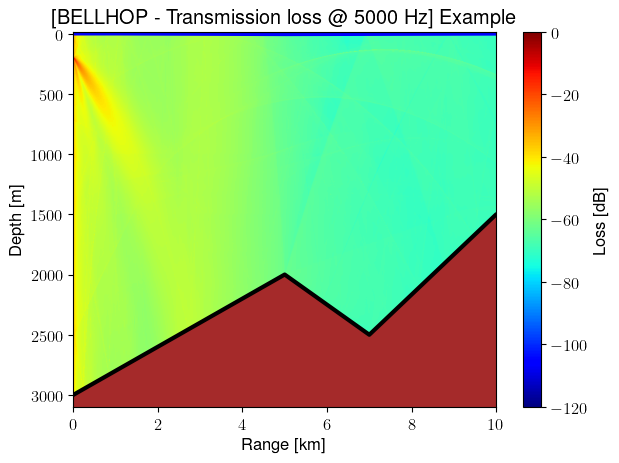

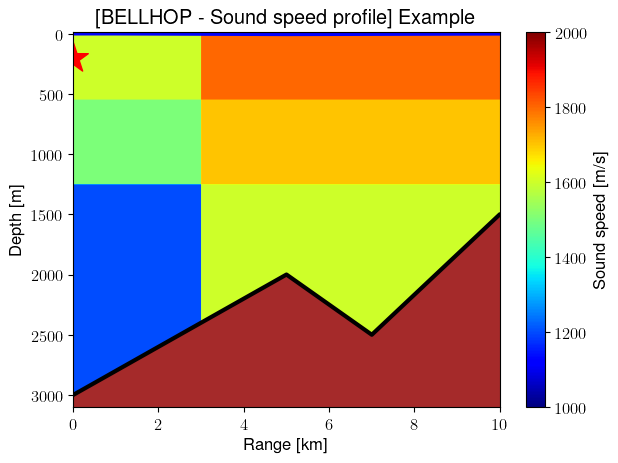

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[BELLHOP - Sound speed profile] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [9]:
BELLHOP.compute_transmission_loss(debug=False)
BELLHOP.plot_transmission_loss()
BELLHOP.plot_ssp(vmin=1000, vmax=2000)

In [10]:
env['rx_range'] = 1500
env['rx_depth'] = 500
env = pm.make_env2d(**env)    
env = BELLHOP.set_env(env)

In [11]:
BELLHOP.compute_arrivals()
BELLHOP.compute_impulse_respsonse(fs=24000, nArrival=100)
BELLHOP.compute_eigen_rays()
BELLHOP.compute_rays();

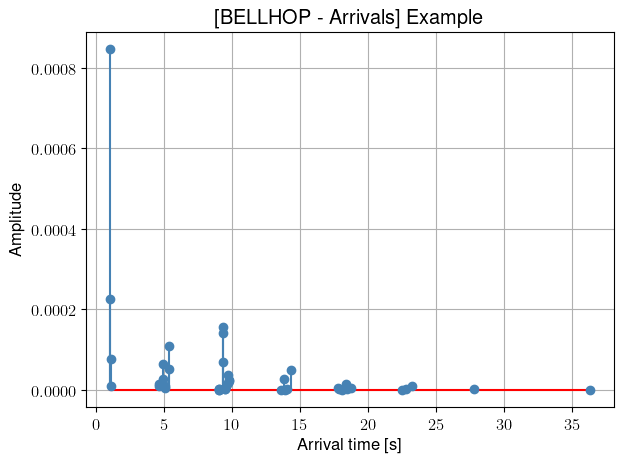

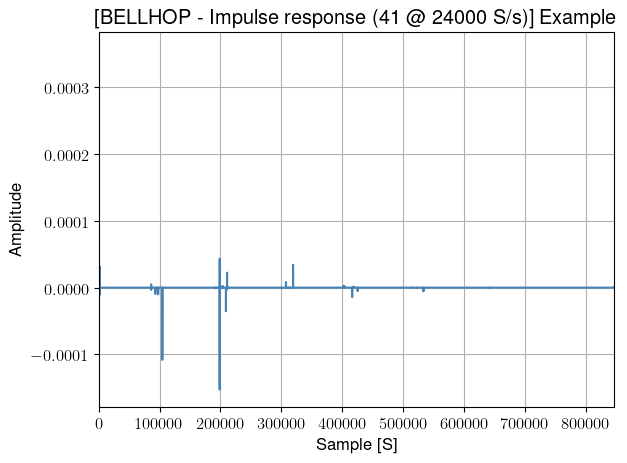

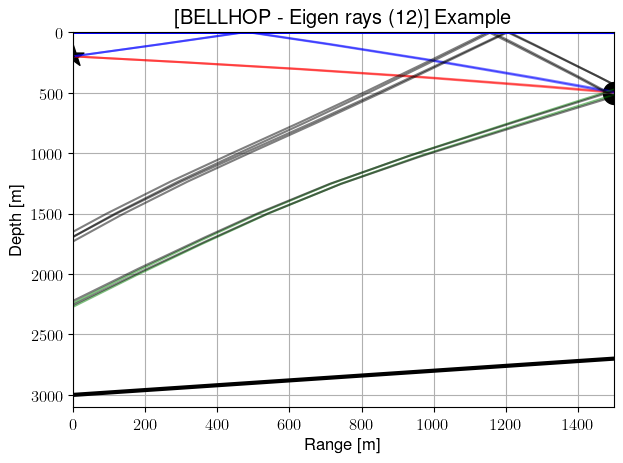

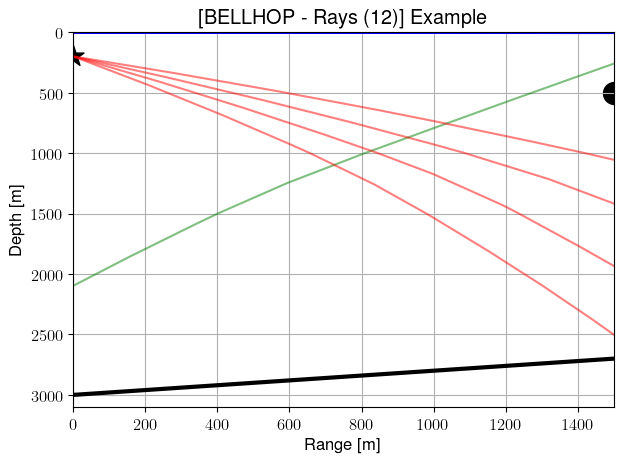

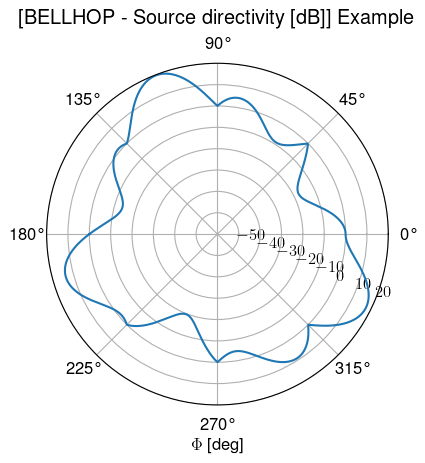

(<Figure size 640x480 with 1 Axes>,
 <PolarAxes: title={'center': '[BELLHOP - Arrivals beam [dB]] Example'}, xlabel='$\\Phi$ [deg]'>)

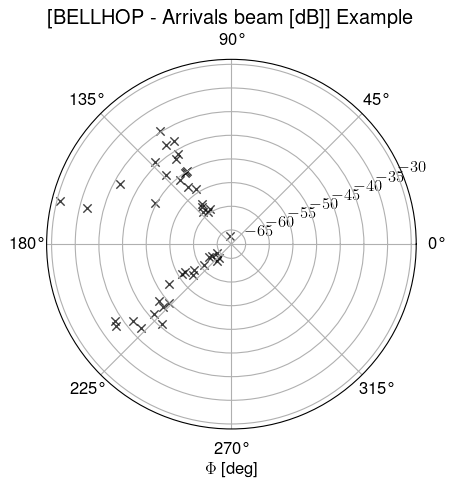

In [12]:
BELLHOP.plot_arrivals(nArrival=50)  
BELLHOP.plot_impulse_response(nArrival=50) 
BELLHOP.plot_eigen_rays(nRay=12)  
BELLHOP.plot_rays(nRay=12)   
BELLHOP.plot_beam()
BELLHOP.plot_arrivals_beam()